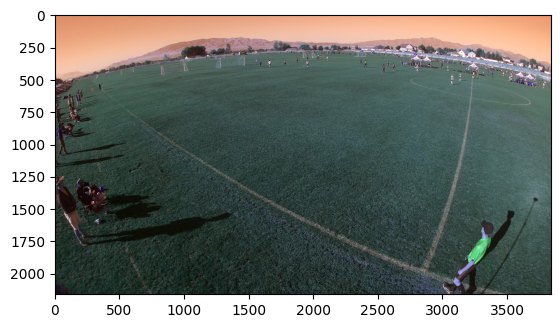

In [1]:
import numpy as np
import cv2
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import PyQt5
import cv2
import numpy as np
#  jupyter nbconvert perspective_cv.ipynb --to python
def undistor_img(im_org):
    distortion = [3.670680675357433, 1.1612862793879029, 0.0, 
                0.0, 0.010907748126931006, 4.029813052720811, 
                2.357017484561505, 0.16278370795452082, 0.0, 
                0.0, 0.0, 0.0, 0.0, 0.0]

    # im_org = cv2.imread("detectiong_other_lines_field/video_4_00_45_25_left001.png")
    # (w,h) = np.shape(im_org)

    h, w, d = im_org.shape

    #intrinsic left camera matrix
    mtx = np.array([[1933.1962437237123, 0.0, 1836.8866309535802], 
                [0.0, 1933.74682448549, 878.6808564823706],
                [0.0, 0.0, 1.0]])

    distortion = np.array(distortion)

    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx,distortion,(w,h),1,(w,h))

    dst = cv2.undistort(im_org, mtx, distortion, None, newcameramtx)

    #crop image in after undistort

    x,y,w,h = roi
    dst = dst[y:y+h, x:x+w]

    return dst

#frame = cv2.imread('video_12_00_26_20_left001.png')
frame = cv2.imread('video_4_00_26_20_left001.png')
%matplotlib inline
plt.imshow(frame)



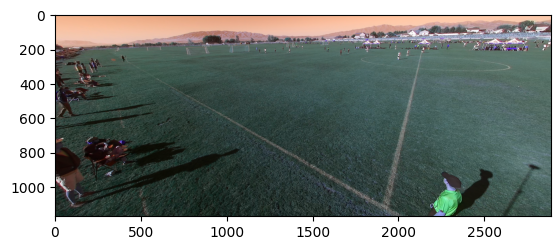

In [2]:
frame = undistor_img(frame)
%matplotlib inline

plt.imshow(frame)

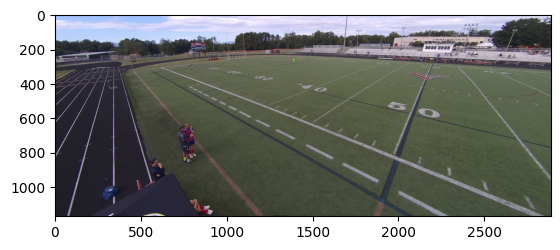

In [3]:
frame = cv2.imread('test.png')
plt.imshow(frame)
im_dim = [2888,1170]
frame = cv2.resize(frame,(im_dim[0],im_dim[1]))
%matplotlib inline

plt.imshow(frame)

In [4]:
# warping section

"""
# points of four corners
pts1 = np.float32([[1952, 820], [2204, 286],[1318, 236], [613, 304]])
pts2 = np.float32([[1952, 820], [1952, 286],[200 , 286], [200, 820]])

# points with goal center and middle of field

#pts1 = np.float32([[1952, 820], [2202, 340],[1061, 253], [454, 324]])
#pts2 = np.float32([[1952, 820], [1952, 410],[200 , 410], [200, 820]])

    
# Apply Perspective Transform Algorithm
matrix = cv2.getPerspectiveTransform(pts1, pts2)

print (matrix)
result = cv2.warpPerspective(frame, matrix, (im_dim[0], im_dim[1]),flags=cv2.INTER_LINEAR)

plt.imshow(result)
"""
%matplotlib qt
plt.imshow(frame)
points = plt.ginput(4)
print(points)
%matplotlib inline

[(1957.3930600649355, 817.487012987013), (2191.6463068181824, 285.6688311688313), (1355.9320211038962, 235.01948051948057), (615.1852678571429, 304.6623376623377)]


In [5]:
#cv2.destroyAllWindows()
#four corners in undistorted images 
# VIDEO 12 LEFT
#"""
pts1 = np.float32([[1952, 820], # corner bottom right
                [2204, 286], # top,right
                [1318, 236], # top left
                [613, 304]]) # bottom left
print(pts1)
#"""
pts1 = np.float32([list(points[0]), # corner bottom right
                list(points[1]), # top,right
                list(points[2]), # top left
                list(points[3])]) # bottom left
print(pts1)

[[1952.  820.]
 [2204.  286.]
 [1318.  236.]
 [ 613.  304.]]
[[1957.3931   817.487  ]
 [2191.6462   285.66882]
 [1355.932    235.01949]
 [ 615.18524  304.66232]]


In [6]:
# PROBLEM
# current metod does not work because of proportions, maybe investigate the maths behind it?


print("finds points on close sideline from center of field to end")

# finds points on close sideline from center of field to end
vs = pts1[3]-pts1[0]
print(vs)
props = np.array([0,787,1076,1231,1310,np.linalg.norm(vs)]);
vs_base = vs/np.linalg.norm(vs)
print(vs_base)

S = []

for i in range(0,len(props)):
    S.append(pts1[0] + vs_base*props[i])
S = np.array(S)

print(S)




finds points on close sideline from center of field to end
[-1342.2078  -512.8247]
[-0.93413824 -0.35691136]
[[1957.3931   817.487  ]
 [1222.2263   536.5978 ]
 [ 952.2603   433.45038]
 [ 807.4689   378.12912]
 [ 733.672    349.9331 ]
 [ 615.1853   304.6623 ]]


In [7]:
print("Finds points from top left corner to top right")
# Finds points from top left corner to top right
vl = pts1[2]-pts1[1]
print(vl)
props_l = np.array([0,245,432,585,740,np.linalg.norm(vl)]);
vl_base = vl/np.linalg.norm(vl)
print(vl_base)

L = []
for i in range(0,len(props_l)):
    L.append(pts1[1] + vl_base*props_l[i])
L = np.array(L)

print(L)

Finds points from top left corner to top right
[-835.71423   -50.649338]
[-0.9981685  -0.06049505]
[[2191.6462   285.66882]
 [1947.095    270.84753]
 [1760.4375   259.53497]
 [1607.7177   250.27922]
 [1453.0015   240.90248]
 [1355.932    235.01949]]


In [8]:
print("Finds points from bootom right corner to top right")
#Finds points from bootom right corner to top right
vc = pts1[1]-pts1[0]
print(vc)
props_c = np.array([0,442,520,562,np.linalg.norm(vc)]);
vc_base = vc/np.linalg.norm(vc)
print(vc_base)

C = []
for i in range(0,len(props_c)):
    C.append(pts1[0] + vc_base*props_c[i])
C = np.array(C)

print(C)

Finds points from bootom right corner to top right
[ 234.25317 -531.8182 ]
[ 0.4031036  -0.91515434]
[[1957.3931   817.487  ]
 [2135.565    412.98877]
 [2167.0068   341.60675]
 [2183.9373   303.1703 ]
 [2191.6462   285.66882]]


In [9]:
print("Finds points from bottom left corner to top left")

vg = pts1[2]-pts1[3]
print(vg)
props_g = np.array([0,353,454,614,np.linalg.norm(vg)])
vg_base = vg/np.linalg.norm(vg)
print(vg_base)

G = []
for i in range(0,len(props_g)):
    G.append(pts1[3] + vg_base*props_g[i])
G = np.array(G)

print(G)

Finds points from bottom left corner to top left
[740.74677 -69.64284]
[ 0.99560946 -0.09360428]
[[ 615.18524  304.66232]
 [ 966.6354   271.62   ]
 [1067.1919   262.166  ]
 [1226.4895   247.1893 ]
 [1355.932    235.01949]]


6 6
5 5


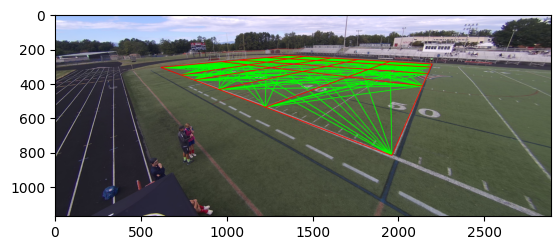

In [10]:
def drawline(PT1,PT2,frame,colour):
    #colour = (255, 0, 0)
    pt1 = (int(PT1[0]),int(PT1[1]))
    #print(pt1)
    pt2 = (int(PT2[0]),int(PT2[1]))
    #print(pt2)
    cv2.line(frame,pt1,pt2,colour,4)
    

# outer lines
drawline(L[0],L[-1],frame,(255,0,0))
drawline(G[0],G[-1],frame,(0,255,0))
drawline(S[0],S[-1],frame,(0,255,255))
drawline(C[0],C[-1],frame,(0,0,255))
# line grid
print(len(S),len(L))
print(len(C),len(G))

def generate_grid(S,G,L,C):
    lines = []
    for i in range(0,len(S)):
        for j in range(0,len(G)):
            drawline(S[i],G[j],frame,(0,255,0))
            lines.append([S[i],G[j]])
            drawline(S[i],C[j],frame,(0,255,0))
            lines.append([S[i],C[j]])
            drawline(L[i],G[j],frame,(0,255,0))
            lines.append([L[i],G[j]])
            drawline(L[i],C[j],frame,(0,255,0))
            lines.append([L[i],C[j]])
    """
    for i in range(0,len(S)):
        for j in range(0,len(L)):
            drawline(S[i],L[j],frame,(0,0,255))
            lines.append([S[i],L[j]])
    for i in range(0,len(C)):
        for j in range(0,len(G)):
            drawline(C[i],G[j],frame,(0,0,255))
            lines.append([C[i],G[j]])
    """
    for i in range(0,len(S)):
        drawline(S[i],L[i],frame,(255,0,0))
        lines.append([S[i],L[i]])

    for i in range(0,len(C)):
        drawline(C[i],G[i],frame,(255,0,0))
        lines.append([C[i],G[i]])

    return lines

lines = generate_grid(S,G,L,C)

'''
# external borders, uncomment only for visualization
for i in range(0,len(S)):
    drawline(S[i],L[i],frame,(255,0,0))

for i in range(0,len(C)):
    drawline(C[i],G[i],frame,(255,0,0))
'''

plt.imshow(frame)



In [11]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return int(x), int(y)

wf =68 # wid
hlf = 50
c_w = 18
lengths = [0,10,20,30,40,50]
widths = [0,25,25+c_w/2,25+c_w,wf]

S_real = []
L_real = []
G_real = []
C_real = []

for i in range(0,len(lengths)):
    S_real.append([lengths[i],0])
    L_real.append([lengths[i],wf])
for i in range(0,len(widths)):
    G_real.append([0,widths[i]])
    C_real.append([50,widths[i]])
lines_real = generate_grid(S_real,G_real,L_real,C_real)

S_real = np.array(S_real)
L_real = np.array(L_real)
G_real = np.array(G_real)
C_real = np.array(C_real)
print("check colums: ")
print(len(S_real),len(S))
print(len(L_real),len(L))
print(len(G_real),len(G))
print(len(C_real),len(C))
print(len(lines),len(lines_real))


check colums: 
6 6
6 6
5 5
5 5
131 131


In [12]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
point = Point(0.5, 0.5)
polygon = Polygon([(points[0][0]+5,points[0][1]+5),(points[1][0]+5,points[1][1]-5),(points[2][0]-5,points[2][1]-5),(points[3][0]-5,points[3][1]+5)])
print(polygon.contains(point))

points_real =[(hlf,0),(hlf,wf),(0,wf),(0,0)]

False


2461 2461


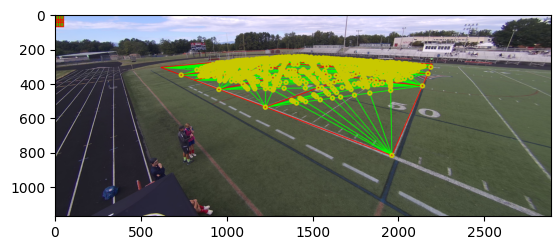

In [13]:
#for loop starts here
#provide intersection list to function
def find_intersections(lines,points,lines_real,points_real):
    #points_addition = 
    polygon = Polygon(points)
    polygon_real = Polygon(points_real)
    itscs = []
    itscs_real = []
    for i in range(0,len(lines)):
        # starting line
        b_line = lines[i]
        PT1 = b_line[0]
        PT2 = b_line[1]

        b_line_r = lines_real[i]
        PT1r = b_line_r[0]
        PT2r = b_line_r[1]

        for j in range(i,len(lines)):
            #points 3 and 4 represent a vertical line
            PT3 = lines[j][0]
            PT4 = lines[j][1]
            PT3r= lines_real[j][0]
            PT4r= lines_real[j][1]

            x1 = PT1[0]
            y1 = PT1[1]
            x2 = PT2[0]
            y2 = PT2[1]
            x1_ = PT3[0]
            y1_ = PT3[1]
            x2_ = PT4[0]
            y2_ = PT4[1]

            x1r = PT1r[0]
            y1r = PT1r[1]
            x2r = PT2r[0]
            y2r = PT2r[1]
            x1_r = PT3r[0]
            y1_r = PT3r[1]
            x2_r = PT4r[0]
            y2_r = PT4r[1]
            
            try:
                intersection = line_intersection(((x1, y1), (x2, y2)), ((x1_, y1_), (x2_, y2_)))
                intersection_real = line_intersection(((x1r, y1r), (x2r, y2r)), ((x1_r, y1_r), (x2_r, y2_r)))
                point = Point(intersection[0], intersection[1])
                point_r = Point(intersection_real[0], intersection_real[1])
                if(polygon.contains(point)):
                    cv2.circle(frame,intersection,10,(200,200,0),10)
                    itscs.append(intersection)
                    itscs_real.append(intersection_real)
            except:
                continue
    
    itscs = np.array(itscs)
    itscs_real = np.array(itscs_real)
    return itscs,itscs_real

itsec_pixl,itsec_real = find_intersections(lines,points,lines_real,points_real)
plt.imshow(frame)
print(len(itsec_pixl),len(itsec_real))




In [25]:

import tensorflow as tf
from tensorflow import keras
# model
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(2,activation='sigmoid')) # relu has to be avoided for last layer
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss='mse', #used to be mse, lets see if we get an improvement
              metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                192       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,338
Trainable params: 2,338
Non-trainable params: 0
_________________________________________________________________


In [26]:
from sklearn.model_selection import train_test_split

wrld_coord = np.divide(itsec_real,np.array([hlf,wf])) #normalisation step
pixl_coord = np.divide(itsec_pixl,np.array(im_dim)) #normalisation step
print(wrld_coord[10],pixl_coord[10])

p_train, p_test,w_train, w_test = train_test_split(pixl_coord,wrld_coord ,
                                   test_size=0.5, 
                                   shuffle=True)
  
batch = 16# tested with 10, maybe 32 helps a little more
eps = 100
history = model.fit(p_train,w_train,validation_split = 0.2,batch_size=batch, epochs=eps)
#keras.backend.set_value(model.optimizer.learning_rate, 0.001)
#model.fit(pixl_coord,wrld_coord,batch_size=batch, epochs=eps)

[0.         1.41176471] [0.63504155 0.24700855]
Epoch 1/100
62/62 [==============================] - 1s 5ms/step - loss: 1.3323 - accuracy: 0.6626 - val_loss: 0.6060 - val_accuracy: 0.6789
Epoch 2/100
62/62 [==============================] - 0s 3ms/step - loss: 1.3131 - accuracy: 0.6443 - val_loss: 0.5682 - val_accuracy: 0.5813
Epoch 3/100
62/62 [==============================] - 0s 3ms/step - loss: 1.3249 - accuracy: 0.6148 - val_loss: 0.5752 - val_accuracy: 0.6260
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 1.3141 - accuracy: 0.5732 - val_loss: 0.5594 - val_accuracy: 0.6057
Epoch 5/100
62/62 [==============================] - 0s 3ms/step - loss: 1.3067 - accuracy: 0.6850 - val_loss: 0.5540 - val_accuracy: 0.7398
Epoch 6/100
62/62 [==============================] - 0s 3ms/step - loss: 1.3052 - accuracy: 0.6077 - val_loss: 0.5592 - val_accuracy: 0.6789
Epoch 7/100
62/62 [==============================] - 0s 3ms/step - loss: 1.3009 - accuracy: 0.6717 - val_l

In [27]:
test = np.divide(np.array([[1390,289]]),np.array(im_dim))
#print(test)
test_result = model.predict(test)
#print(test_result)
test_result = [test_result[0][0]*hlf,test_result[0][1]*wf]
print(test_result)

1/1 [==============================] - 0s 79ms/step
[23.072044551372528, 27.760515928268433]


Text(0.5, 1.0, 'Training and Validation Accuracy')

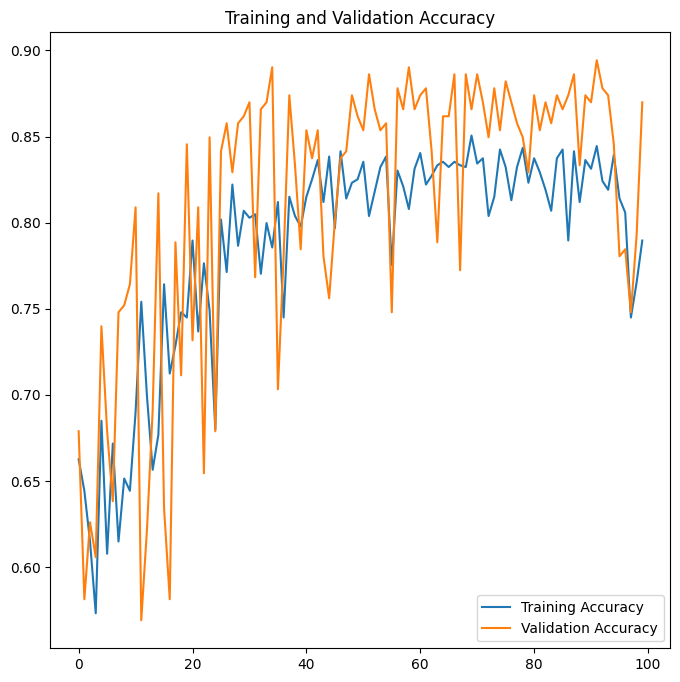

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(eps)
plt.figure(figsize=(8, 8))
#plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

730 1061
[244.79439269006252, 431.9826966524124]


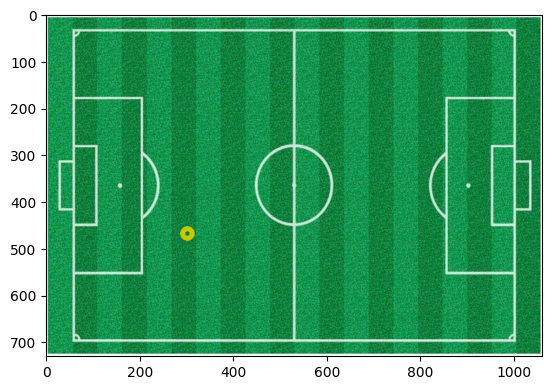

In [44]:
field = cv2.imread('field.png')
plt.imshow(field)
h, w, d = field.shape
print(h,w)
x = test_result[0]*w/hlf
unit_result = [test_result[0]*w/(2*hlf),h - test_result[1]*h/wf]
offset = [58,37]
cv2.circle(field,(int(offset[0]+unit_result[0]),int(offset[1]+unit_result[1])),10,(200,200,0),10)
plt.imshow(field)
print(unit_result)





In [45]:
model.save('VNN_good_results')

INFO:tensorflow:Assets written to: VNN_good_results\assets
